## 2 Lab 1: Sparse optimization of linear models

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**a)**:

$$W^{k+1} = W^k - \mu \frac{dL}{dW^k}$$
where
$$\frac{dL}{dW^k} = \frac{d(\Sigma_i(X_iW^k - y_i)^2)}{dW^k} = 2 \Sigma_i (X_iW^k - y_i)X_i$$
and putting everything together we obtain the formula for weight $W^{k+1}$:
$$W^{k+1} = W^k - \mu * 2 \Sigma_i^{3} (X_iW^k - y_i)X_i$$

**b)**:

In [220]:
# initializing variables
X_1 = np.array([1, -2, -1, -1, 1])
X_2 = np.array([2, -1, 2, 0, -2])
X_3 = np.array([-1, 0, 2, 2, 1])

X = np.matrix([X_1, X_2, X_3])

y_1 = [7]
y_2 = [1]
y_3 = [1]

y = np.matrix([y_1, y_2, y_3])

W = np.matrix([[0.0], [0.0], [0.0], [0.0], [0.0]])

lr = 0.02
num_steps = 200

losses = [np.sum(np.square((X.dot(W) - y)))] # initial loss
w_elem_1 = [0] # initial values
w_elem_2 = [0]
w_elem_3 = [0]
w_elem_4 = [0]
w_elem_5 = [0]

for step in range(num_steps):
    # calculate gradient
    grad = 2 * X.T @ (X.dot(W) - y)

    # update weights
    W -= lr * grad

    # calculate loss
    loss = np.sum(np.square((X.dot(W) - y)))
    losses.append(loss)

    # save weights
    w_elem_1.append(W[0].item())
    w_elem_2.append(W[1].item())
    w_elem_3.append(W[2].item())
    w_elem_4.append(W[3].item())
    w_elem_5.append(W[4].item())

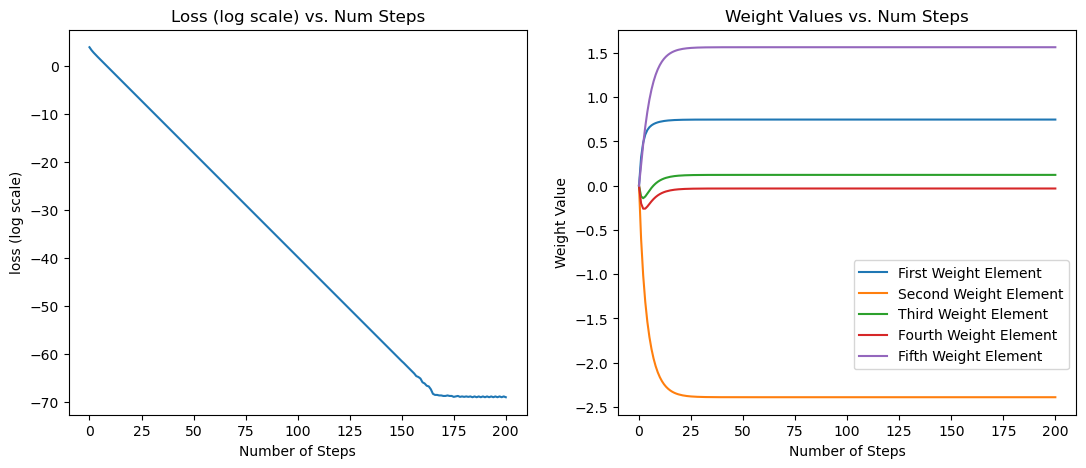

In [221]:
# create plots
fig, ax = plt.subplots(1, 2, figsize=(13, 5))

# plotting MSE loss in log scale vs. Num Steps
ax[0].plot(np.arange(num_steps+1), np.log(np.array(losses).flatten()))
ax[0].set_title("Loss (log scale) vs. Num Steps")
ax[0].set_xlabel("Number of Steps")
ax[0].set_ylabel("loss (log scale)")
ax[1].plot(np.arange(num_steps+1), np.array(w_elem_1), label = "First Weight Element")
ax[1].plot(np.arange(num_steps+1), np.array(w_elem_2), label = "Second Weight Element")
ax[1].plot(np.arange(num_steps+1), np.array(w_elem_3), label = "Third Weight Element")
ax[1].plot(np.arange(num_steps+1), np.array(w_elem_4), label = "Fourth Weight Element")
ax[1].plot(np.arange(num_steps+1), np.array(w_elem_5), label = "Fifth Weight Element")
ax[1].set_title("Weight Values vs. Num Steps")
ax[1].set_xlabel("Number of Steps")
ax[1].set_ylabel("Weight Value")
plt.legend(loc = "lower right", bbox_to_anchor=(1, 0.1))
plt.show()

Based on the above observations, it seems like the values stabilize around 25 steps. Loss function converges after 25 steps as well. W is converging to an optimal solution. W is not converging to a sparse solution, because we still have 3 non-zero weights. We see that third and fourth weight elements are very close to 0 in its optimal solution.

**c)**:

In [266]:
# re-initializing variables
X_1 = np.array([1, -2, -1, -1, 1])
X_2 = np.array([2, -1, 2, 0, -2])
X_3 = np.array([-1, 0, 2, 2, 1])

X = np.matrix([X_1, X_2, X_3])

y_1 = [7]
y_2 = [1]
y_3 = [1]

y = np.matrix([y_1, y_2, y_3])

W = np.matrix([[0.0], [0.0], [0.0], [0.0], [0.0]])

lr = 0.02
num_steps = 200
threshold = 2

# ----------------------------
losses = [np.sum(np.square((X.dot(W) - y)))] # initial loss
w_elem_1 = [0] # initial values
w_elem_2 = [0]
w_elem_3 = [0]
w_elem_4 = [0]
w_elem_5 = [0]

for step in range(num_steps):

    # calculate gradient
    grad = 2 * X.T @ (X.dot(W) - y)

    # update weights
    W -= lr * grad

    # performing projected gradient descent - will have at most threshold non-zero elements (but could be less)
    if np.count_nonzero(W) > threshold:
        W = np.array(W.tolist()).flatten()
        n_smallest = np.sort(np.absolute(W))[:(len(W) - threshold)].tolist()
        absolute_nums = np.absolute(W).tolist()
        zero_idx = [1 if i in n_smallest else 0 for i in absolute_nums]
        W = [[element] if idx == 0 else [0] for element, idx in zip(W, zero_idx)]
        W = np.matrix(W)

    # calculate loss
    loss = np.sum(np.square((X.dot(W) - y)))
    losses.append(loss)

    # save weights
    w_elem_1.append(W[0].item())
    w_elem_2.append(W[1].item())
    w_elem_3.append(W[2].item())
    w_elem_4.append(W[3].item())
    w_elem_5.append(W[4].item())

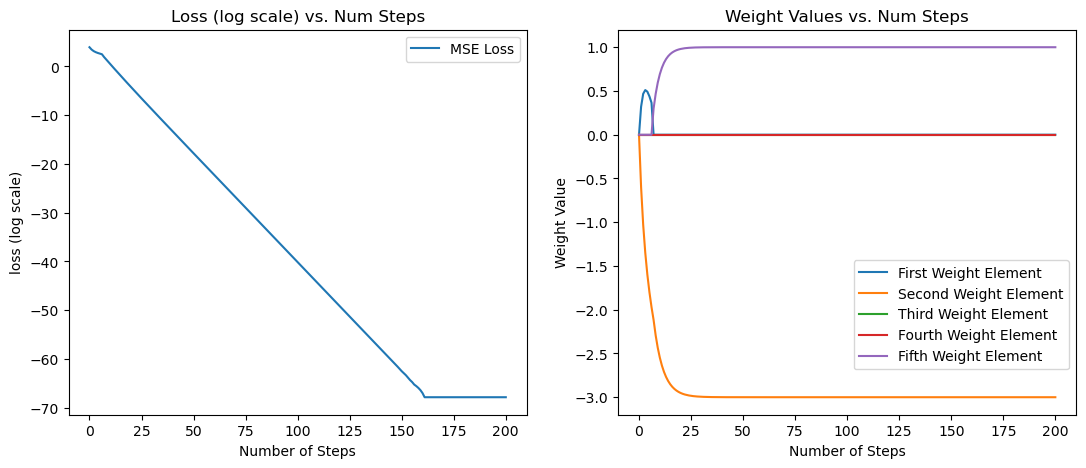

In [267]:
# create plots
fig, ax = plt.subplots(1, 2, figsize=(13, 5))

# plotting MSE loss in log scale vs. Num Steps
ax[0].plot(np.arange(num_steps+1), np.log(np.array(losses).flatten()))
ax[0].set_title("Loss (log scale) vs. Num Steps")
ax[0].set_xlabel("Number of Steps")
ax[0].set_ylabel("loss (log scale)")
ax[0].legend(["MSE Loss"])
ax[1].plot(np.arange(num_steps+1), np.array(w_elem_1), label = "First Weight Element")
ax[1].plot(np.arange(num_steps+1), np.array(w_elem_2), label = "Second Weight Element")
ax[1].plot(np.arange(num_steps+1), np.array(w_elem_3), label = "Third Weight Element")
ax[1].plot(np.arange(num_steps+1), np.array(w_elem_4), label = "Fourth Weight Element")
ax[1].plot(np.arange(num_steps+1), np.array(w_elem_5), label = "Fifth Weight Element")
ax[1].set_title("Weight Values vs. Num Steps")
ax[1].set_xlabel("Number of Steps")
ax[1].set_ylabel("Weight Value")
plt.legend(loc = "lower right", bbox_to_anchor=(1, 0.1))
plt.show()

**d)**: 

In [299]:
lambdas = [0.2, 0.5, 1.0, 2.0]
all_losses = {}
all_w_elem_1 = {}
all_w_elem_2 = {}
all_w_elem_3 = {}
all_w_elem_4 = {}
all_w_elem_5 = {}

for lambda_value in lambdas:
    # initializing variables
    X_1 = np.array([1, -2, -1, -1, 1])
    X_2 = np.array([2, -1, 2, 0, -2])
    X_3 = np.array([-1, 0, 2, 2, 1])

    X = np.matrix([X_1, X_2, X_3])

    y_1 = [7]
    y_2 = [1]
    y_3 = [1]

    y = np.matrix([y_1, y_2, y_3])

    W = np.matrix([[0.0], [0.0], [0.0], [0.0], [0.0]])

    lr = 0.02
    num_steps = 200

    losses = [np.sum(np.square((X.dot(W) - y))) + lambda_value * np.sum(np.abs(W))] # initial loss
    w_elem_1 = [0] # initial values
    w_elem_2 = [0]
    w_elem_3 = [0]
    w_elem_4 = [0]
    w_elem_5 = [0]

    for step in range(num_steps):
        # calculate gradient
        grad = 2 * X.T @ (X.dot(W) - y) + lambda_value * np.sign(W) # gradient with L1 regularization

        # update weights
        W -= lr * grad

        # calculate loss
        loss = np.sum(np.square((X.dot(W) - y))) #+ lambda_value * np.sum(np.abs(W))
        losses.append(loss)

        # save weights
        w_elem_1.append(W[0].item())
        w_elem_2.append(W[1].item())
        w_elem_3.append(W[2].item())
        w_elem_4.append(W[3].item())
        w_elem_5.append(W[4].item())
    
    all_losses[lambda_value] = losses
    all_w_elem_1[lambda_value] = w_elem_1
    all_w_elem_2[lambda_value] = w_elem_2
    all_w_elem_3[lambda_value] = w_elem_3
    all_w_elem_4[lambda_value] = w_elem_4
    all_w_elem_5[lambda_value] = w_elem_5

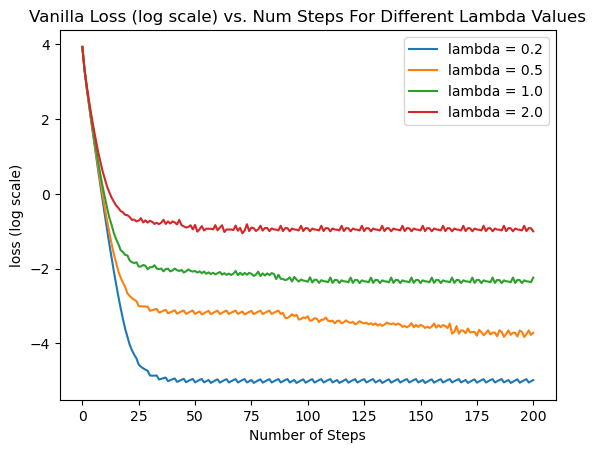

In [300]:
# create plots

# plotting MSE loss in log scale vs. Num Steps
plt.plot(np.arange(num_steps+1), np.log(np.array(all_losses[0.2]).flatten()), label="lambda = 0.2")
plt.plot(np.arange(num_steps+1), np.log(np.array(all_losses[0.5]).flatten()), label="lambda = 0.5")
plt.plot(np.arange(num_steps+1), np.log(np.array(all_losses[1.0]).flatten()), label="lambda = 1.0")
plt.plot(np.arange(num_steps+1), np.log(np.array(all_losses[2.0]).flatten()), label="lambda = 2.0")
plt.title("Vanilla Loss (log scale) vs. Num Steps For Different Lambda Values")
plt.xlabel("Number of Steps")
plt.ylabel("loss (log scale)")
plt.legend()
plt.show()

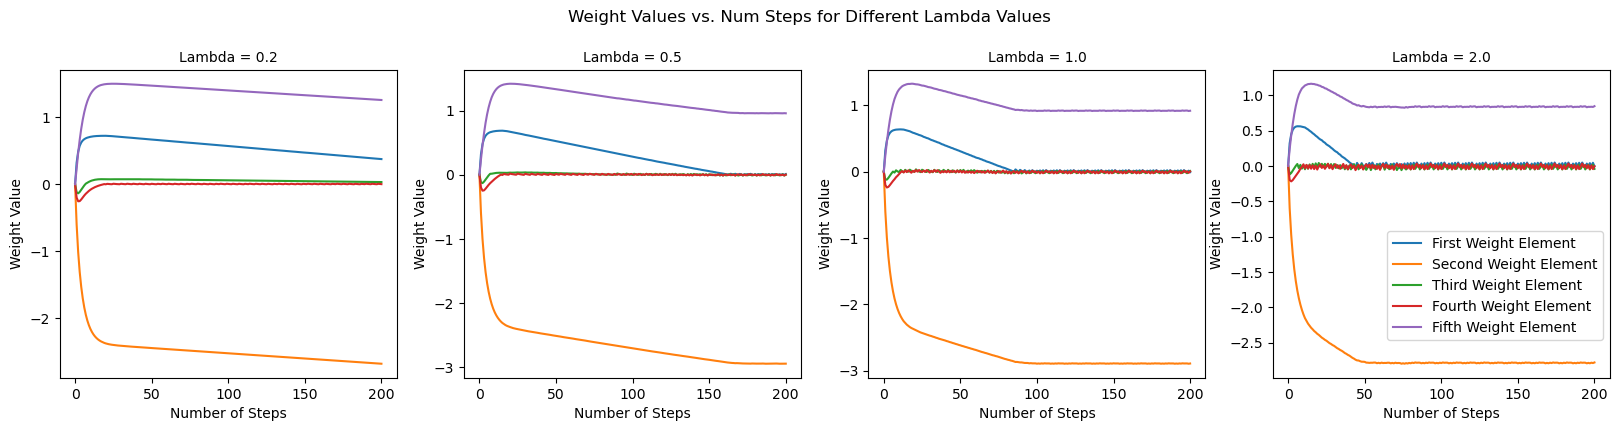

In [301]:
# create a 1 x 3 figure
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

for i in range(4):
    lambda_value = lambdas[i]
    ax[i].plot(np.arange(num_steps+1), np.array(all_w_elem_1[lambda_value]), label = "First Weight Element")
    ax[i].plot(np.arange(num_steps+1), np.array(all_w_elem_2[lambda_value]), label = "Second Weight Element")
    ax[i].plot(np.arange(num_steps+1), np.array(all_w_elem_3[lambda_value]), label = "Third Weight Element")
    ax[i].plot(np.arange(num_steps+1), np.array(all_w_elem_4[lambda_value]), label = "Fourth Weight Element")
    ax[i].plot(np.arange(num_steps+1), np.array(all_w_elem_5[lambda_value]), label = "Fifth Weight Element")
    ax[i].set_title("Lambda = " + str(lambda_value), fontsize = 10)
    ax[i].set_xlabel("Number of Steps")
    ax[i].set_ylabel("Weight Value")
plt.legend(loc = "lower right", bbox_to_anchor=(1, 0.1))
plt.suptitle("Weight Values vs. Num Steps for Different Lambda Values", y = 1.03)
plt.show()

**e)**:

In [302]:
thresholds = [0.004, 0.01, 0.02, 0.04]
all_losses = {}
all_w_elem_1 = {}
all_w_elem_2 = {}
all_w_elem_3 = {}
all_w_elem_4 = {}
all_w_elem_5 = {}

for threshold in thresholds:
    # initializing variables
    X_1 = np.array([1, -2, -1, -1, 1])
    X_2 = np.array([2, -1, 2, 0, -2])
    X_3 = np.array([-1, 0, 2, 2, 1])

    X = np.matrix([X_1, X_2, X_3])

    y_1 = [7]
    y_2 = [1]
    y_3 = [1]

    y = np.matrix([y_1, y_2, y_3])

    W = np.matrix([[0.0], [0.0], [0.0], [0.0], [0.0]])

    lr = 0.02
    num_steps = 200

    losses = [np.sum(np.square((X.dot(W) - y)))] # initial loss
    w_elem_1 = [0] # initial values
    w_elem_2 = [0]
    w_elem_3 = [0]
    w_elem_4 = [0]
    w_elem_5 = [0]

    for step in range(num_steps):

        grad = 2 * X.T @ (X.dot(W) - y) 

        # update weights
        W -= lr * grad 

        # perform proximal gradient update on L-1 regularized loss function
        for i in range(len(W)):
            elem = W[i]
            if elem < -threshold:
                elem += threshold
            elif elem > threshold:
                elem -= threshold
            else:
                elem = 0
            W[i] = elem

        # calculate loss
        lambda_value = threshold / lr
        loss = np.sum(np.square((X.dot(W) - y))) #+ lambda_value * np.sum(np.abs(W)) 
        losses.append(loss)

        # save weights
        w_elem_1.append(W[0].item())
        w_elem_2.append(W[1].item())
        w_elem_3.append(W[2].item())
        w_elem_4.append(W[3].item())
        w_elem_5.append(W[4].item())
    
    all_losses[threshold] = losses
    all_w_elem_1[threshold] = w_elem_1
    all_w_elem_2[threshold] = w_elem_2
    all_w_elem_3[threshold] = w_elem_3
    all_w_elem_4[threshold] = w_elem_4
    all_w_elem_5[threshold] = w_elem_5

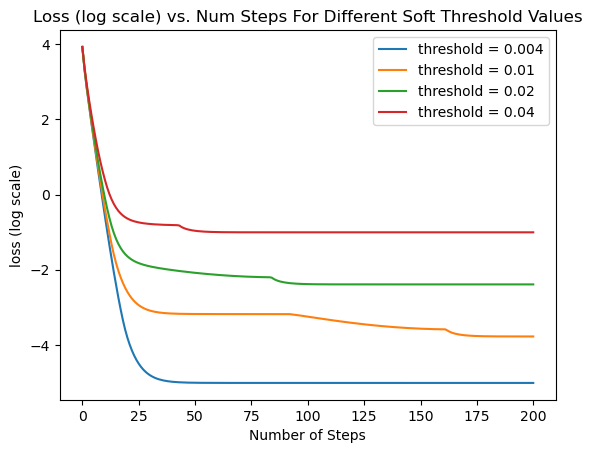

In [303]:
# create plots

# plotting MSE loss in log scale vs. Num Steps
plt.plot(np.arange(num_steps+1), np.log(np.array(all_losses[0.004]).flatten()), label="threshold = 0.004")
plt.plot(np.arange(num_steps+1), np.log(np.array(all_losses[0.01]).flatten()), label="threshold = 0.01")
plt.plot(np.arange(num_steps+1), np.log(np.array(all_losses[0.02]).flatten()), label="threshold = 0.02")
plt.plot(np.arange(num_steps+1), np.log(np.array(all_losses[0.04]).flatten()), label="threshold = 0.04")
plt.title("Loss (log scale) vs. Num Steps For Different Soft Threshold Values")
plt.xlabel("Number of Steps")
plt.ylabel("loss (log scale)")
plt.legend()
plt.show()

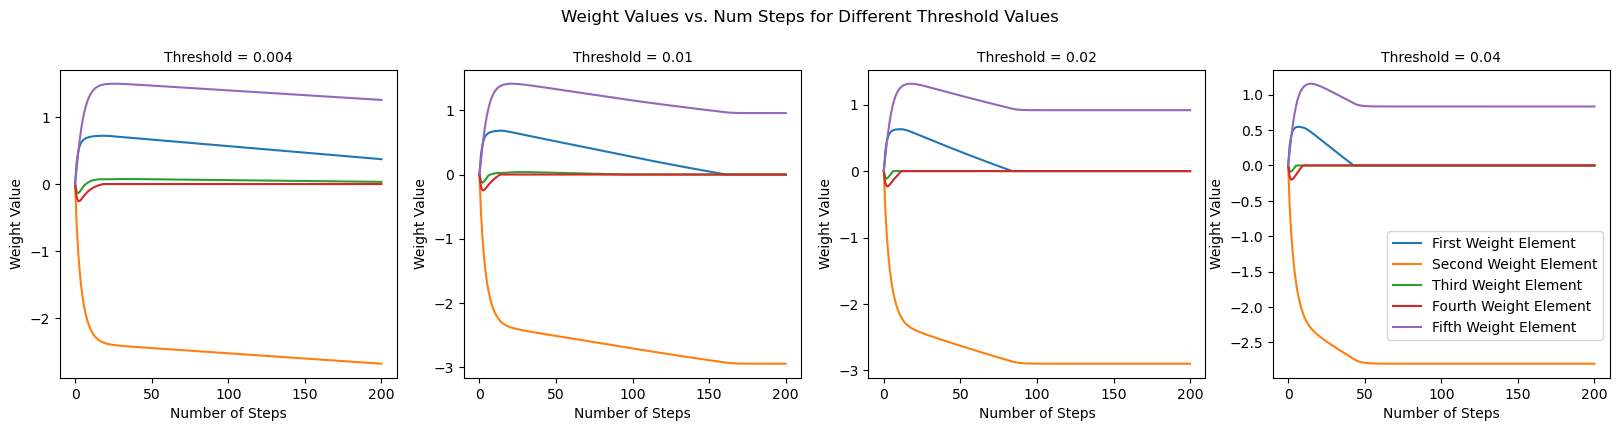

In [304]:
# create a 1 x 3 figure
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

for i in range(4):
    threshold = thresholds[i]
    ax[i].plot(np.arange(num_steps+1), np.array(all_w_elem_1[threshold]), label = "First Weight Element")
    ax[i].plot(np.arange(num_steps+1), np.array(all_w_elem_2[threshold]), label = "Second Weight Element")
    ax[i].plot(np.arange(num_steps+1), np.array(all_w_elem_3[threshold]), label = "Third Weight Element")
    ax[i].plot(np.arange(num_steps+1), np.array(all_w_elem_4[threshold]), label = "Fourth Weight Element")
    ax[i].plot(np.arange(num_steps+1), np.array(all_w_elem_5[threshold]), label = "Fifth Weight Element")
    ax[i].set_title("Threshold = " + str(threshold), fontsize = 10)
    ax[i].set_xlabel("Number of Steps")
    ax[i].set_ylabel("Weight Value")
plt.legend(loc = "lower right", bbox_to_anchor=(1, 0.1))
plt.suptitle("Weight Values vs. Num Steps for Different Threshold Values", y = 1.03)
plt.show()

**f)**: 

In [312]:
thresholds = [0.02, 0.04, 0.1, 0.2]
lambdas = [1.0, 2.0, 5.0, 10.0]
all_losses = {}
all_w_elem_1 = {}
all_w_elem_2 = {}
all_w_elem_3 = {}
all_w_elem_4 = {}
all_w_elem_5 = {}

for i in range(len(thresholds)):

    threshold = thresholds[i]
    #lambda_current = lambdas[i]

    # initializing variables
    X_1 = np.array([1, -2, -1, -1, 1])
    X_2 = np.array([2, -1, 2, 0, -2])
    X_3 = np.array([-1, 0, 2, 2, 1])

    X = np.matrix([X_1, X_2, X_3])

    y_1 = [7]
    y_2 = [1]
    y_3 = [1]

    y = np.matrix([y_1, y_2, y_3])

    W = np.matrix([[0.0], [0.0], [0.0], [0.0], [0.0]])

    lr = 0.02
    num_steps = 200

    losses = [np.sum(np.square((X.dot(W) - y)))] # initial loss
    w_elem_1 = [0] # initial values
    w_elem_2 = [0]
    w_elem_3 = [0]
    w_elem_4 = [0]
    w_elem_5 = [0]

    for step in range(num_steps):

        grad = 2 * X.T @ (X.dot(W) - y) 

        # update weights
        W -= lr * grad

        # find the three smallest weights by absolute value
        smallest_weights = np.array(W).flatten()
        smallest_weights = np.argsort(np.abs(smallest_weights))
        smallest_weights = smallest_weights[:3]

        # perform proximal gradient update on L-1 regularized loss function
        for i in smallest_weights:
            elem = W[i]
            if elem < -threshold:
                elem += threshold
            elif elem > threshold:
                elem -= threshold
            else:
                elem = 0
            W[i] = elem

        # calculate loss
        loss = np.sum(np.square((X.dot(W) - y))) 
        losses.append(loss)
        

        # save weights
        w_elem_1.append(W[0].item())
        w_elem_2.append(W[1].item())
        w_elem_3.append(W[2].item())
        w_elem_4.append(W[3].item())
        w_elem_5.append(W[4].item())
    
    all_losses[threshold] = losses
    all_w_elem_1[threshold] = w_elem_1
    all_w_elem_2[threshold] = w_elem_2
    all_w_elem_3[threshold] = w_elem_3
    all_w_elem_4[threshold] = w_elem_4
    all_w_elem_5[threshold] = w_elem_5

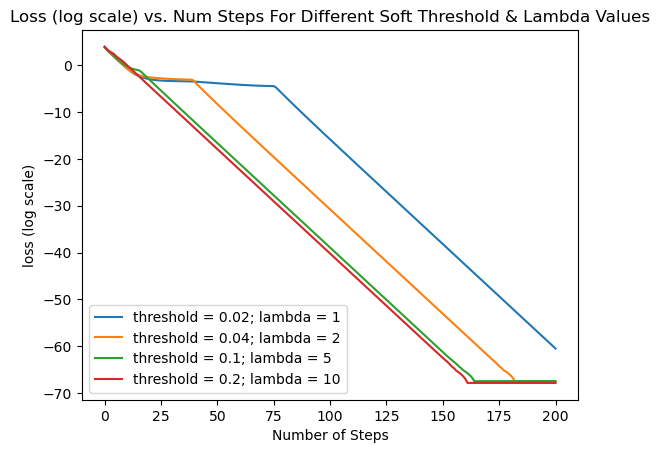

In [313]:
# create plots

# plotting MSE loss in log scale vs. Num Steps
plt.plot(np.arange(num_steps+1), np.log(np.array(all_losses[0.02]).flatten()), label="threshold = 0.02; lambda = 1")
plt.plot(np.arange(num_steps+1), np.log(np.array(all_losses[0.04]).flatten()), label="threshold = 0.04; lambda = 2")
plt.plot(np.arange(num_steps+1), np.log(np.array(all_losses[0.1]).flatten()), label="threshold = 0.1; lambda = 5")
plt.plot(np.arange(num_steps+1), np.log(np.array(all_losses[0.2]).flatten()), label="threshold = 0.2; lambda = 10")
plt.title("Loss (log scale) vs. Num Steps For Different Soft Threshold & Lambda Values")
plt.xlabel("Number of Steps")
plt.ylabel("loss (log scale)")
plt.legend()
plt.show()

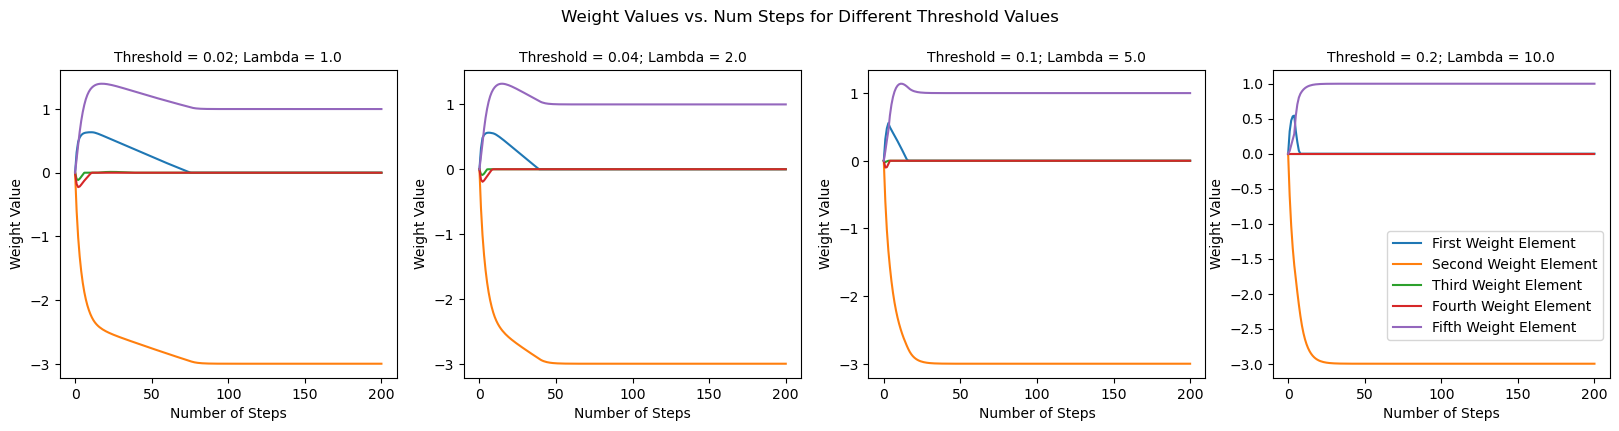

In [314]:
# create a 1 x 3 figure
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

for i in range(4):
    threshold = thresholds[i]
    lambda_value = lambdas[i]
    ax[i].plot(np.arange(num_steps+1), np.array(all_w_elem_1[threshold]), label = "First Weight Element")
    ax[i].plot(np.arange(num_steps+1), np.array(all_w_elem_2[threshold]), label = "Second Weight Element")
    ax[i].plot(np.arange(num_steps+1), np.array(all_w_elem_3[threshold]), label = "Third Weight Element")
    ax[i].plot(np.arange(num_steps+1), np.array(all_w_elem_4[threshold]), label = "Fourth Weight Element")
    ax[i].plot(np.arange(num_steps+1), np.array(all_w_elem_5[threshold]), label = "Fifth Weight Element")
    ax[i].set_title("Threshold = " + str(threshold) + "; Lambda = " + str(lambda_value), fontsize = 10)
    ax[i].set_xlabel("Number of Steps")
    ax[i].set_ylabel("Weight Value")
plt.legend(loc = "lower right", bbox_to_anchor=(1, 0.1))
plt.suptitle("Weight Values vs. Num Steps for Different Threshold Values", y = 1.03)
plt.show()

Early steps (first 25 steps)

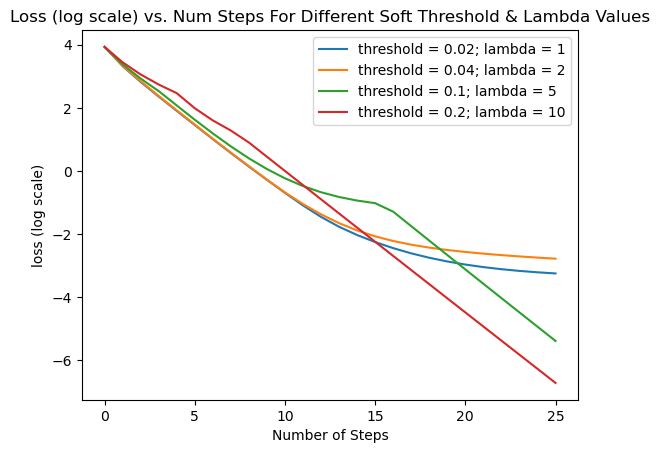

In [315]:
# create plots

# plotting MSE loss in log scale vs. Num Steps
plt.plot(np.arange(26), np.log(np.array(all_losses[0.02]).flatten()[:26]), label="threshold = 0.02; lambda = 1")
plt.plot(np.arange(26), np.log(np.array(all_losses[0.04]).flatten()[:26]), label="threshold = 0.04; lambda = 2")
plt.plot(np.arange(26), np.log(np.array(all_losses[0.1]).flatten()[:26]), label="threshold = 0.1; lambda = 5")
plt.plot(np.arange(26), np.log(np.array(all_losses[0.2]).flatten()[:26]), label="threshold = 0.2; lambda = 10")
plt.title("Loss (log scale) vs. Num Steps For Different Soft Threshold & Lambda Values")
plt.xlabel("Number of Steps")
plt.ylabel("loss (log scale)")
plt.legend()
plt.show()

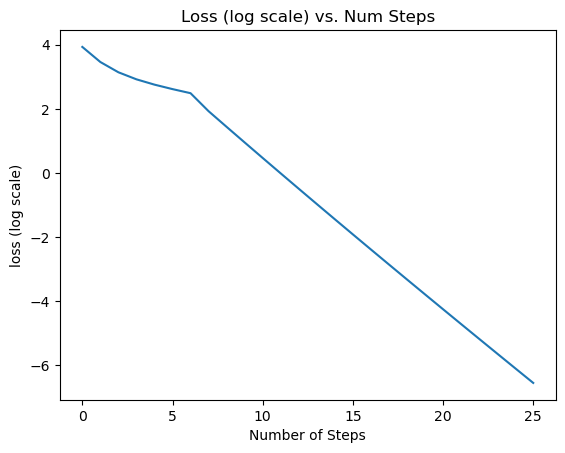

In [268]:
# create plots - iterative pruning

# plotting MSE loss in log scale vs. Num Steps
plt.plot(np.arange(26), np.log(np.array(losses).flatten())[:26])
plt.title("Loss (log scale) vs. Num Steps")
plt.xlabel("Number of Steps")
plt.ylabel("loss (log scale)")
plt.show()